In [46]:
#PHASE-1(MODEL CREATION/LEARNING)
#
#
#
#### if you have any dout in below code  please refer previous algorithm model code for reference mostly codes are similar ####

In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("50_startups.csv")
#dataset

In [3]:
dataset=pd.get_dummies(dataset,drop_first=True)
#dataset

In [4]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [10]:
independent=dataset[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]
dependent=dataset[['Profit']]


In [12]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y= train_test_split(independent,dependent,test_size=0.30,random_state=0)


In [44]:
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor(criterion="friedman_mse",splitter="random")#changing this "hyper tunning" parameter can lead to better model.
regressor.fit(train_x,train_y)                                              # refer google for more "hyper tunning" parameter...

DecisionTreeRegressor(criterion='friedman_mse', splitter='random')

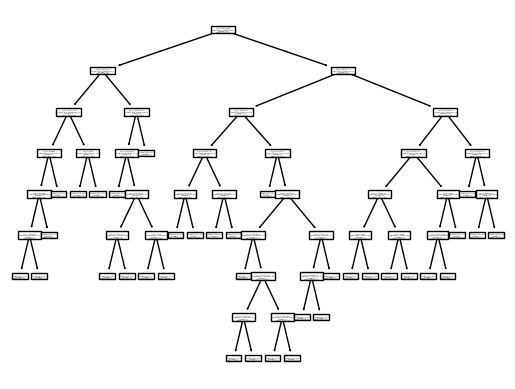

In [42]:
import matplotlib.pyplot as plt  #this library is used for plotting graph.
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [18]:
y_pred=regressor.predict(test_x)

In [22]:
from sklearn.metrics import r2_score
r2=r2_score(test_y,y_pred)
r2

0.9226241364875545

In [48]:
import pickle
filename ="finalized_decision_tree_model.sav"
pickle.dump(regressor,open(filename,"wb"))

In [50]:
# PHASE-2 (DEPLOYMENT/IMPLEMENT/PRODUCTION)
#
#
#

In [52]:
import pickle
loded_model=pickle.load(open("finalized_decision_tree_model.sav","rb"))       #loading our model using saved file name.
result=loded_model.predict([[153441.51,101145.55,407934.54,False,True]])
print(result)                           #you can use this model by using this particular code for any future prediction in new file...

[182901.99]


C:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
